#**Classify Song Genres from Audio Data**

##*Project IA - Artificial Intelligent*

###**Authors**
* Diana Balanta
* Carlos Bolaños
* Danna Espinosa

In [1]:
#Configuring the environment
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **About the project**

In recent years, streaming services with large catalogs have become the primary means through which most people listen to their favorite music. But at the same time, the sheer quantity of music on offer can mean that users can feel mean that users can feel a bit overwhelmed when trying to find newer music that suits their tastes.

For this reason, streaming services have sought ways to categorize music to enable personalized recommendations. One method involves directly analyzing the information contained in an audio file of a given song, calculating a variety of metrics that will function as features. In this project, they will examine data collected by a research group known as The Echo Nest. The goal is to review this data set and classify songs as 'Hip-Hop' or 'Rock', all without listening to a single song, the goal is to have it done automatically by an algorithm.



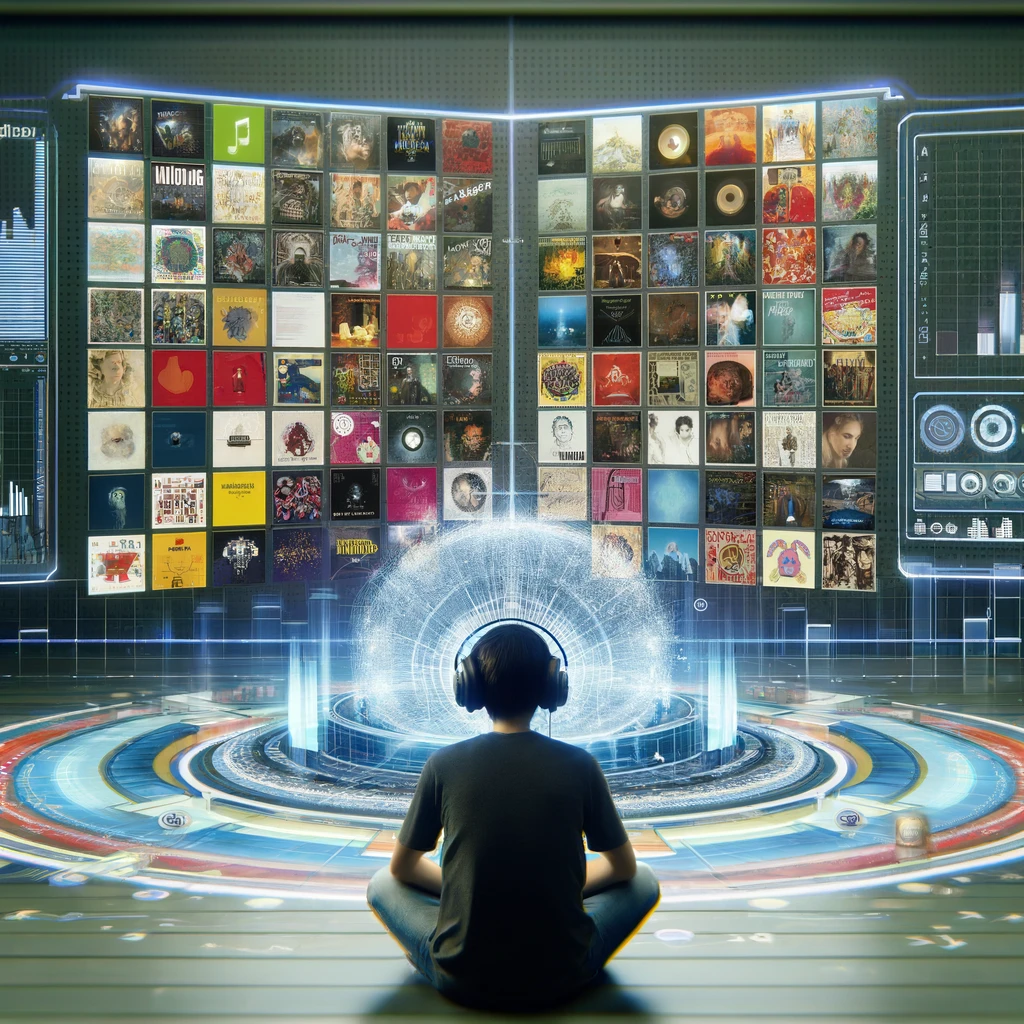

In [2]:
from IPython.display import Image
Image('/content/drive/MyDrive/Proyecto_IA/images/music_catalogs.jpg')

## **About the dataset**

The *“Classify Song Genres from Audio Data*” dataset focuses on classifying songs in the Hip-Hop and Rock genres using features extracted from the music without the need to listen to the songs. This data comes from The Echo Nest, now part of Spotify, and is presented in two main files: one in CSV format and one in JSON format.


### **Data File Description:**


* **fma-rock-vs-hiphop.csv:**
Contains general information about the songs, including titles and a crucial 'genre_top' column indicating whether the song is Rock or Hip-Hop.

| Column |  Description                                  |
|--------------|--------------------------------------|
| `track_id`   | Unique identifier for the track.             |
| `genre_top`  | The main genre of the track, target label for prediction. |
| `artist_name`| Name of the artist or band.                  |
| `title`      | Title of the track.                          |



* **echonest-metrics.json:**
Contains metric details about musical characteristics of each track, such as danceability, acoustics, valence and more, totaling eight characteristics.

| Column            | Description                                                    |
|-------------------|----------------------------------------------------------------|
| `track_id`        | Unique identifier for the track, used to link with metadata.   |
| `acousticness`    | Measure of how acoustic the track is.                          |
| `danceability`    | Measure of how danceable the track is.                         |
| `energy`          | Measure of the track's intensity and activity.                 |
| `instrumentalness`| Indicates the likelihood that a track contains no vocals.      |
| `liveness`        | Detects the presence of an audience in the recording.          |
| `speechiness`     | Presence of spoken words in a track.                           |
| `tempo`           | The track's tempo in beats per minute.                         |
| `valence`         | Measure of the musical positivity conveyed by the track.      |


##**Import of required libraries**

In [3]:
#Import pandas
import pandas as pd
# Import numpy
import numpy as np
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split


# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression



##**Preparing the dataset**

### **Data upload**

####**fma-rock-vs-hiphop**

Load the track metadata from a CSV file stored in Google Drive. The file is located in the directory '/content/drive/MyDrive/Proyecto_IA/data/', and it is named 'fma-rock-vs-hiphop.csv'.

The resulting DataFrame, 'df_tracks', contains various details about music tracks, such as track ID, artist name, track title, and genre.

In [4]:
df_tracks = pd.read_csv('/content/drive/MyDrive/Proyecto_IA/data/fma-rock-vs-hiphop.csv')
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [5]:
df_tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


The DataFrame contains 17,734 entries, indicating a relatively large dataset. It has 21 columns, each representing different attributes related to tracks.

* **Complete and Sparse Columns**: Most columns like track_id, bit_rate, comments, date_created, duration, favorites, genre_top, genres, genres_all, interest, listens, number, tags, and title have complete data for all entries (17,734 non-null).

* **Potential Data Cleaning and Preprocessing Needs**: The presence of columns with many missing values (like composer and lyricist) suggests that data cleaning and preprocessing would be necessary.

* **Diverse DataTypes:** The dataset comprises both numeric (int64) and categorical (object) data types, which would need appropriate preprocessing steps such as normalization for numeric data and encoding for categorical data to prepare for any analytical model.

* **Use in Predictive Modeling:** The genre_top column being fully populated makes it a good candidate for a target variable in predictive modeling tasks, such as classifying tracks into genres based on other attributes.

####**echonest-metrics.json**

Load the audio metrics data from a JSON file also stored in Google Drive in the same directory. The file is named 'echonest-metrics.json'.

This JSON file contains audio-related metrics for each track provided by Echo Nest,such as acousticness, danceability, energy, and other audio features.

In [6]:
df_metrics = pd.read_json('/content/drive/MyDrive/Proyecto_IA/data/echonest-metrics.json')
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [7]:
df_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


This DataFrame consists of 13,129 entries and 9 columns related to audio features of music tracks.

* **Uniform Data:** Each column is fully populated with no missing values, indicating comprehensive and consistent data collection.

* **Numerical Focus:** The dataset primarily features numerical data (float64 and int64), which describe various audio characteristics such as acousticness, danceability, and energy. These features are crucial for tasks like music analysis and genre prediction.

* **Potential Uses:**The dataset is ideal for developing models to predict music characteristics or preferences based on acoustic properties. The numerical nature of the data simplifies many preprocessing steps typically required for modeling.

#### **Merge data frames**

Blending the two datasets described-one containing track metadata such as `genre_top` and the other with detailed audio features such as `acousticness`, `danceability` and `energy`-is crucial to effectively predict genre between Rock and Hip-Hop for several reasons:

1. **Comprehensive Feature Set**: By combining metadata with audio features, a more complete feature set is created. Metadata can provide contextual information about the tracks, while audio features provide quantitative measures that directly describe the sound of the tracks.

2. **Improved Model Accuracy**: Audio features alone could provide a solid basis for genre classification, but adding metadata allows models to leverage additional context that could be crucial to correctly identify genres, especially in edge cases.

3. **Deeper Insights**: Analyzing combined datasets allows for deeper insights into which characteristics are most influential in defining genres. For example, Rock might be associated with certain patterns in instrumentality or energy, while Hip-Hop might be defined more by expressiveness and tempo.

In [8]:
# Merge the relevant columns of tracks and echonest_metrics

# This combined DataFrame will be used for predicting the 'genre_top' of each track.
# By merging on 'track_id', we ensure that each track's metadata aligns correctly with its audio features,
# providing a comprehensive dataset that facilitates more accurate genre classification.
df_echo_tracks = pd.merge(df_metrics, df_tracks[["track_id", "genre_top"]], on="track_id")
df_echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


From the summary DataFrame provided after merging the data sets to predict music genres, specifically Rock or Hip Hop, we can infer several key points:

1. **Data Structure and Size**: The merged DataFrame contains 4,802 entries, each representing a unique track. This is a substantial amount of data to train machine learning models focused on genre classification.

2. **Full Data Availability**: All columns are fully populated (4,802 non-zero entries each), indicating that there are no missing values. This is ideal for machine learning as it means that there is no need to apply imputation strategies that could introduce bias or error.


3. **Features Included**: The dataset includes a variety of audio features:
   - **Acousticness, Danceability, Energy, Instrumentalness, Liveness, Speechiness, Tempo, Valence**: These features are quantitative measures derived from audio analysis and are crucial for predicting musical genres, as they capture different aspects of sound that are often characteristic of specific musical styles.
   - **Track ID**: Serves as a unique identifier for each track.
   - **Genre Top**: This is the target variable, indicating the genre of the track (Rock or Hip Hop), which the models will attempt to predict based on the other features.

4. **Data Types**: The dataset contains predominantly floating point numbers (`float64`), suitable for statistical and machine learning models, as they represent real numbers. The `track_id` is an integer (`int64`), and `genre_top` is categorical (`object`).


In [9]:
df_echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


### **Exploratory Data Analysis (EDA)**

#### **Display of the categorical variable genre_top**

In [10]:
# Prints the count of tracks for each genre listed in the 'genre_top' column of the DataFrame.
# This is useful for understanding the distribution of musical genres in the dataset,
# providing insights into which genres are more prevalent and which are less common.
print(df_echo_tracks["genre_top"].value_counts())


genre_top
Rock       3892
Hip-Hop     910
Name: count, dtype: int64


<Axes: title={'center': 'Absolute frequency distribution of genre_top'}, xlabel='genre_top'>

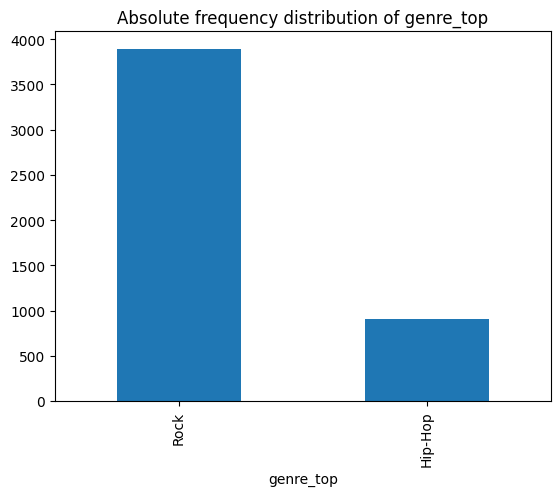

In [11]:
df_echo_tracks['genre_top'].value_counts().plot(kind='bar', title='Absolute frequency distribution of genre_top')

<Axes: title={'center': 'Relative frequency of genre_top'}, xlabel='genre_top'>

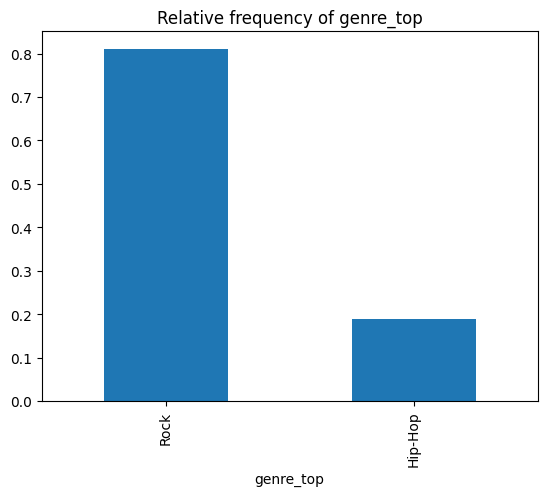

In [12]:
(df_echo_tracks['genre_top'].value_counts()/df_echo_tracks.shape[0]).plot(kind='bar', title='Relative frequency of genre_top')

The frequency count results for the `genre_top` column indicate that there are 3,892 (80%) tracks labeled Rock and 910 (20%) tracks labeled Hip-Hop in the data set.
1. **Genre Imbalance**: There is a significant imbalance between the number of Rock and Hip-Hop tracks. This imbalance may have implications for training machine learning models, where models could be biased towards predicting Rock more often, as they are exposed to more examples of this genre.

2. **Model Evaluation**: When training classification models with this dataset, it will be important to use evaluation metrics that can account for class imbalance. Metrics such as accuracy can be misleading if the model dominates in predicting the majority class. Instead, metrics such as F1 score, precision, recall, and AUC-ROC could provide more information about the model's performance in both genders.

#### **Explore Numerical Characteristics**


In [13]:
df_echo_tracks.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


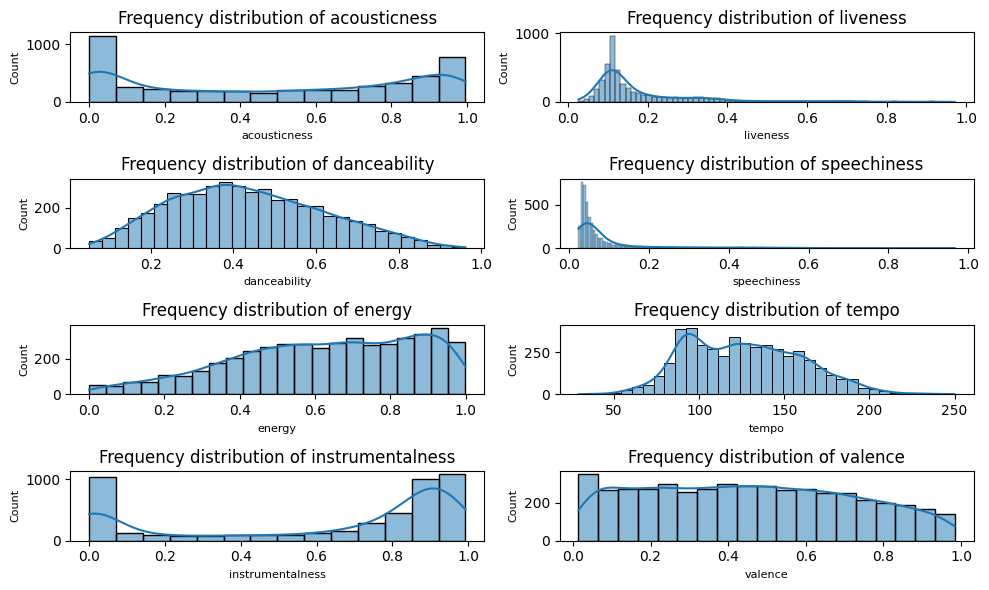

In [14]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
           'speechiness','tempo','valence']

scols = int(len(columns)/2)
srows = 2
fig, axes = plt.subplots(scols, srows, figsize=(10,6))

for i, col in enumerate(columns):
    ax_col = int(i % scols)
    ax_row = int(i // scols)

    sns.histplot(df_echo_tracks[col], ax=axes[ax_col, ax_row], kde=True)
    axes[ax_col, ax_row].set_title('Frequency distribution of '+ col, fontsize=12)
    axes[ax_col, ax_row].set_xlabel(col, fontsize=8)
    axes[ax_col, ax_row].set_ylabel('Count', fontsize=8)

fig.tight_layout()
plt.show()

Based on the summary statistics provided for the dataset `df_echo_tracks.describe()`, we can infer several important characteristics about the dataset and the audio features it contains:

**Distribution of Track Features**:
   - **Acousticness**: Ranges from virtually 0 (9.491e-07) to almost 1 (0.9957965), with a median (0.5156888) suggesting that half the tracks have a moderate level of acoustic elements.
   - **Danceability**: Varies widely (min 0.051307, max 0.961871) with a mean around 0.436, indicating a moderate tendency for tracks to be suitable for dancing.
   - **Energy**: Also shows a broad range (min 0.000279, max 0.999768), with a higher average (0.625), suggesting that tracks generally have a moderate to high energy level.
   - **Instrumentalness**: Most tracks have a high degree of instrumental content (median 0.808752), which could suggest a prevalence of tracks without vocal content.
   - **Liveness**: Typically low across tracks (mean 0.188), indicating few live recordings.
   - **Speechiness**: Generally low (mean 0.104877), suggesting that spoken words are not a dominant component in most tracks.
   - **Tempo**: Ranges from 29.093 to 250.059 beats per minute, with a median near typical popular music tempo (124.625 bpm).
   - **Valence**: Shows a wide range (min 0.014392, max 0.983649) with a median of 0.446240, indicating varied emotional positivity across tracks.


#### **Bivariate Analysis**

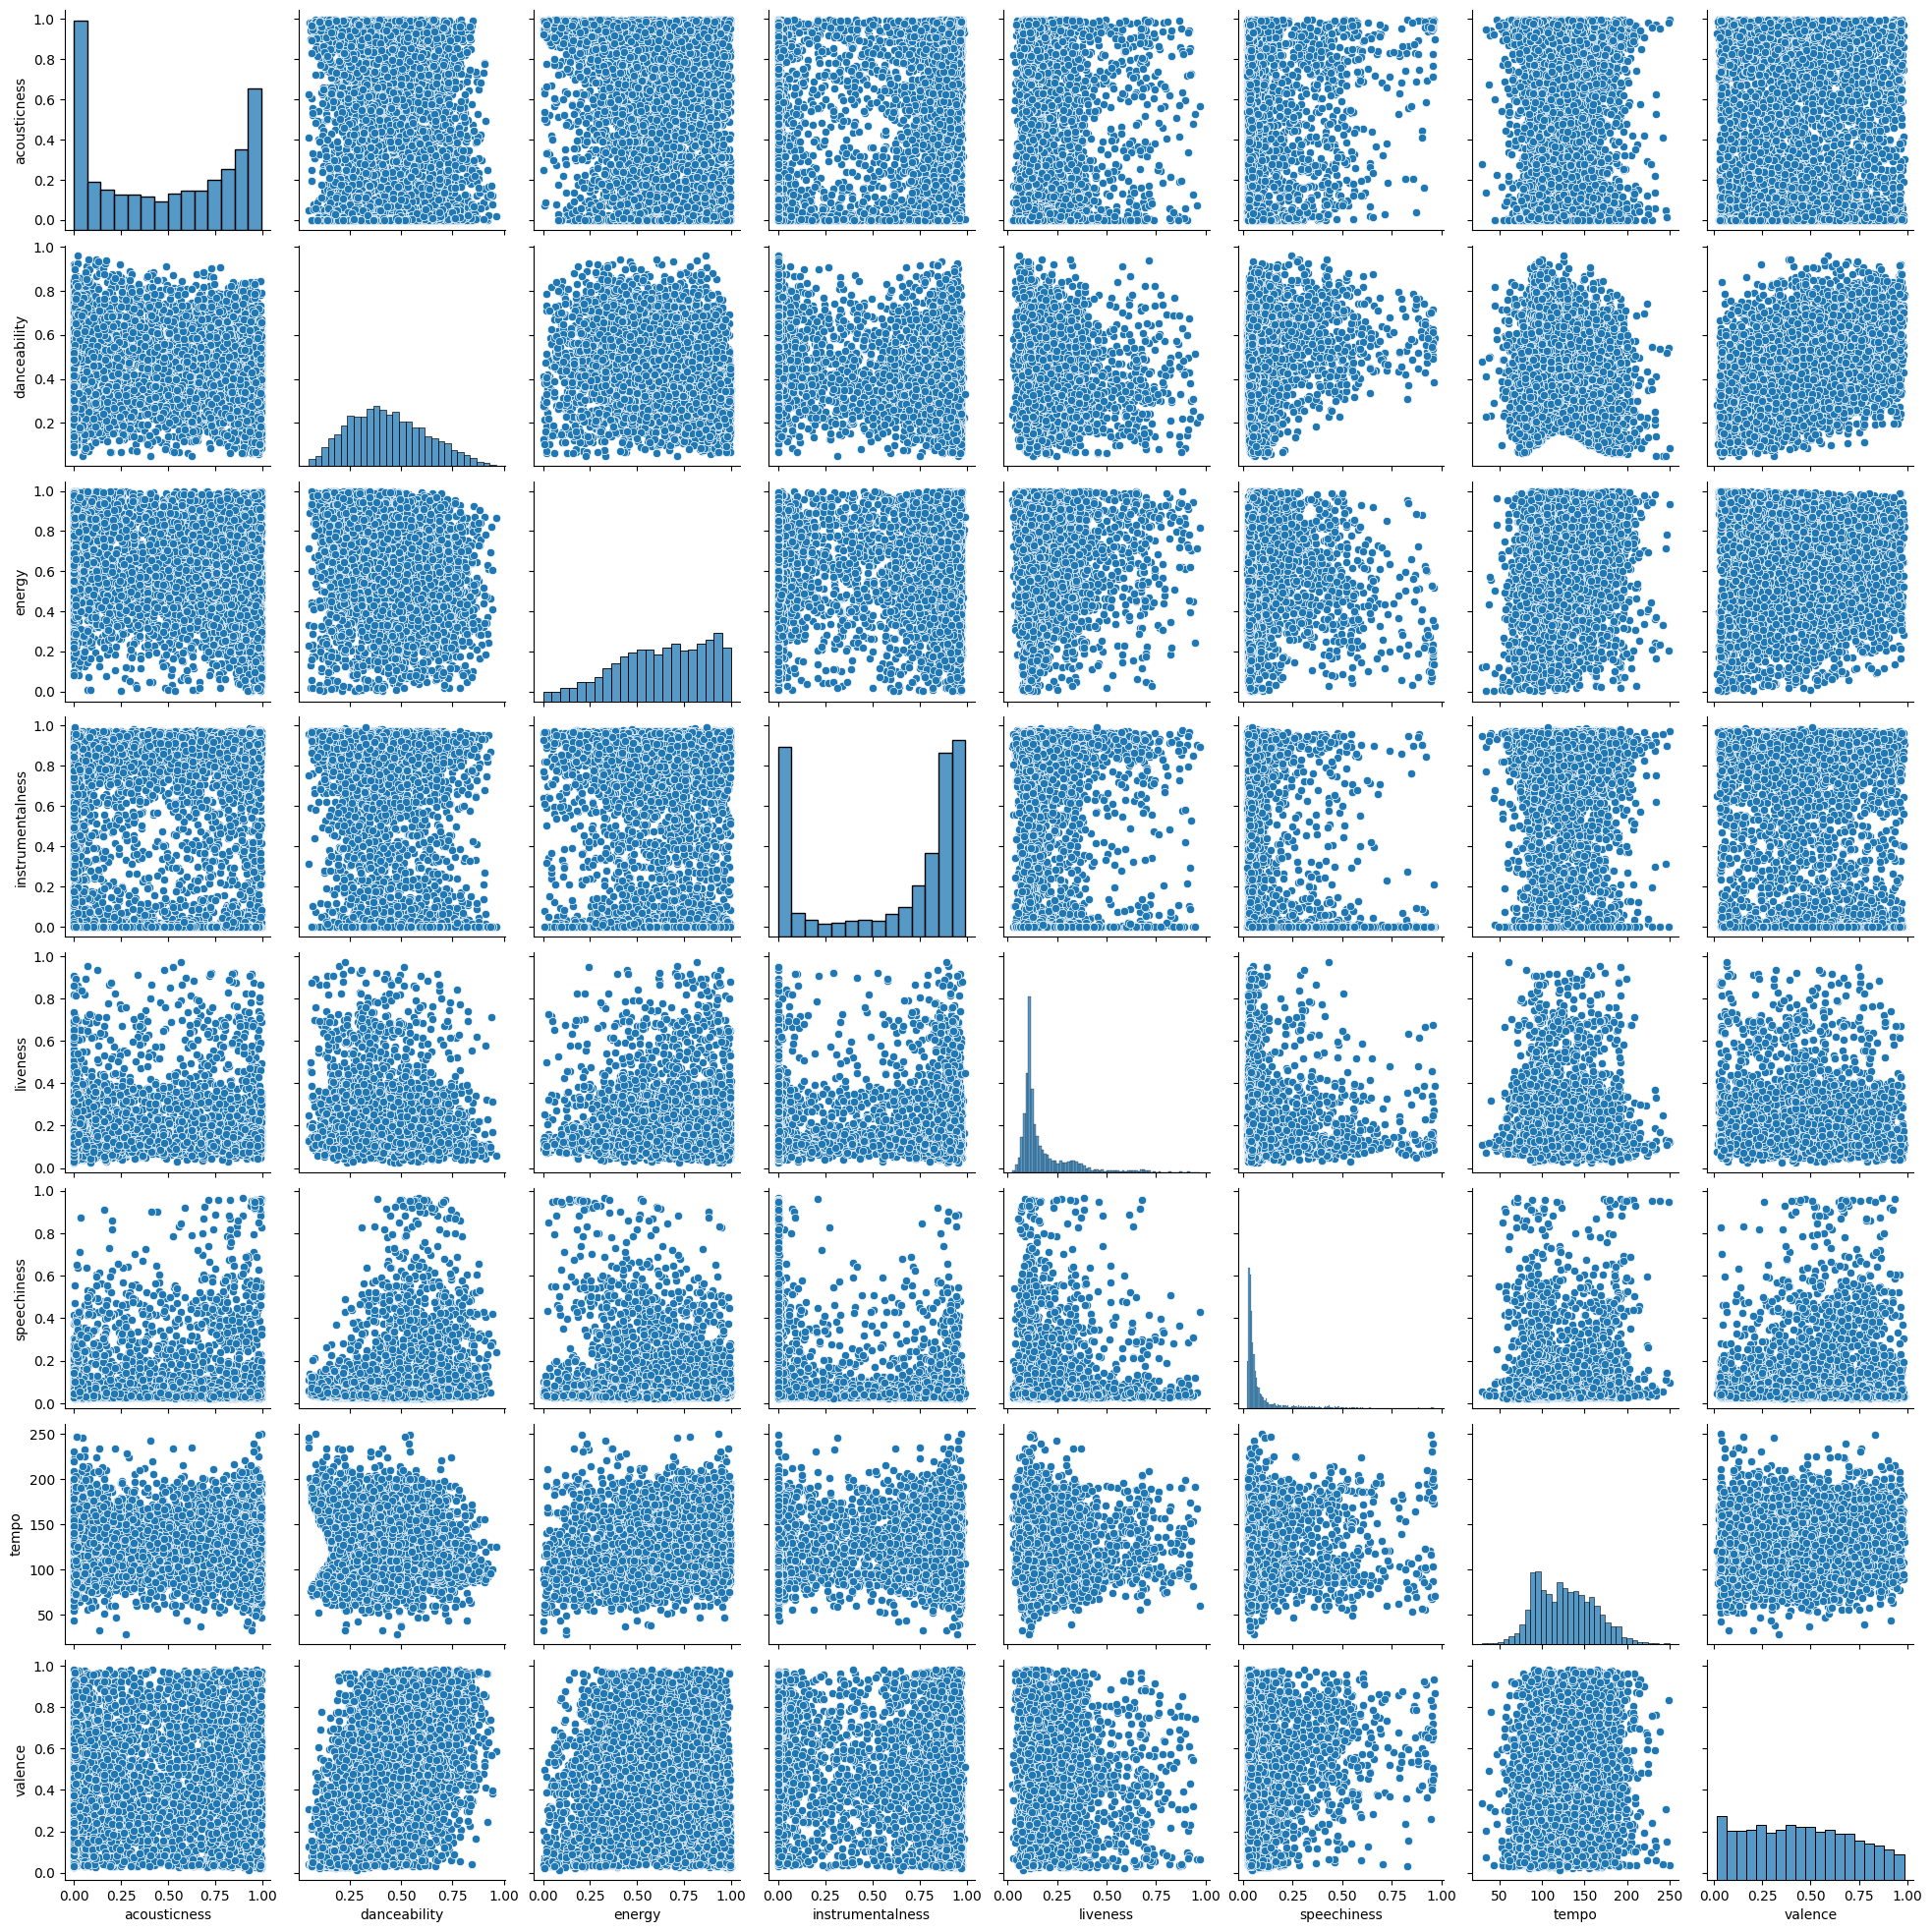

In [15]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
           'speechiness','tempo','valence']

# Uses Seaborn's pairplot function to create plots of each of the columns specified in the columns list in relation to each other.
# specified in the columns list in relation to each other.
sns.pairplot(df_echo_tracks[columns])

- **Marginal Distributions (diagonal graphs)**: The graphs along the diagonal show the distribution of each characteristic individually, through histograms. For example, certain characteristics, such as instrumentality, have a bimodal distribution, suggesting two distinct clusters in the data set – perhaps one representing primarily instrumental cues and another non-instrumental.

- **Bivariate Relationships (off-diagonal graphs)**: These graphs show the relationship between two characteristics. For example, the plot relating "acousticness" and "energy" could show a trend where more acoustic tracks tend to have less energy, which would be intuitive considering that many acoustic recordings can be softer and less intense than produced tracks. electronically.

- **Point Concentration**: Areas where the points are more densely grouped, this indicates a stronger correlation between the characteristics. For example, a grouping of points where "danceability" is high and "tempo" is also high might suggest that more danceable tracks tend to have faster tempos.

- **Anomalies or Outliers**: Points that fall far from the main group may indicate outliers or clues that are unusual compared to the rest of the data set.

<Axes: >

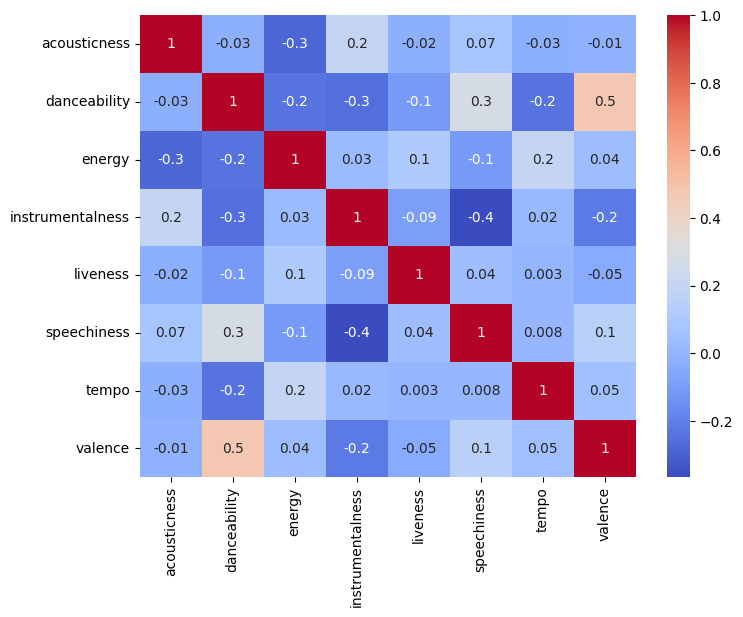

In [16]:
meaningful_columns = ['track_id','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
           'speechiness','tempo','valence']


plt.figure(figsize=(8,6))
#sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')
sns.heatmap(df_echo_tracks[columns].corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

The image shows a correlation matrix for different audio characteristics of music tracks. Each cell in the matrix provides the correlation coefficient between two features, which ranges from -1 to 1. A value of 1 means a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 implies no correlation.

Analysis of notable correlations:

- **Danceability and Valence**: There is a moderately positive correlation (0.5). This suggests that tracks that are considered more danceable also tend to be perceived as more positive or happy.

- **Energy and Acousticness**: There is a moderate negative correlation (-0.3). Tracks with higher energy tend to have fewer acoustic characteristics, which may reflect the difference between energetic, electronically amplified tracks and softer, more acoustic tracks.

- **Instrumentalness and Danceability/Energy**: Instrumentalness shows a negative correlation with Danceability (-0.3) and a very weak correlation with Energy (0.03), which could suggest that instrumental tracks are less danceable. However, the lack of strong correlation with Energy implies that the instrumental tracks do not lean exclusively towards high or low energies.

- **Speechiness**: Correlations with Speechiness are generally low, indicating that the presence of spoken voices is not strongly related to other acoustic characteristics.

There are no extremely strong correlations present, indicating that neither of these characteristics completely determines the other.

#### **Outliers**

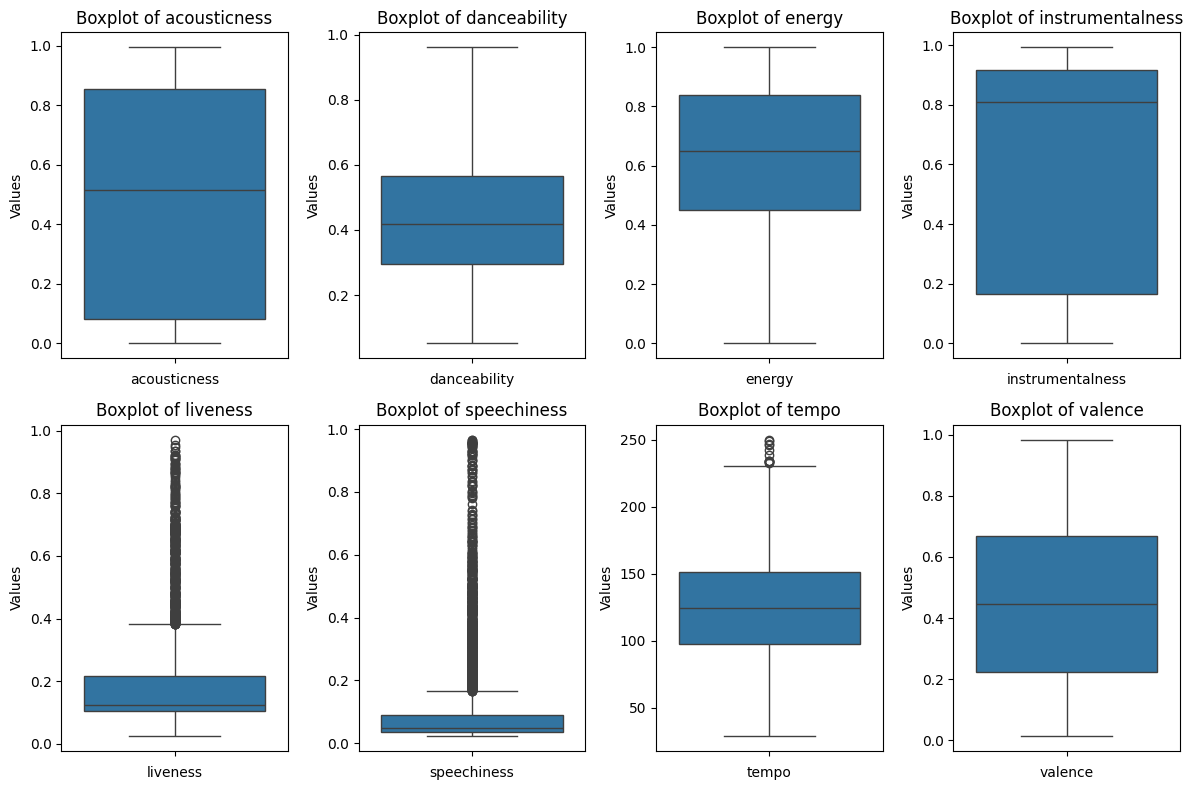

In [17]:
# List of columns to analyze
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
           'speechiness', 'tempo', 'valence']

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot for each variable
for i, col in enumerate(columns):
    plt.subplot(2, 4, i + 1)  # Adjust the numbers based on the number of columns
    sns.boxplot(y=df_echo_tracks[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Analysis of each boxplot:

1. **Acousticness**:
 - Most tracks have low acoustic levels, but there is significant distribution across the range.

2. **Danceability**:
 - Values ​​are more concentrated around the midrange, with fewer hints in the low and high ends. This indicates that most of the tracks have a moderate level of danceability.

3. **Energy**:
 - Similar to danceability, with a concentration in the upper-mid range, indicating that most tracks are energetic.

4. **Instrumentalness**:
 - It exhibits a bimodal distribution, with many values ​​around zero and one, suggesting groups of tracks with low and high instrumental content, respectively.

5. **Liveness**:
 - Most tracks have low levels of liveness, but there are numerous outliers, suggesting some live or audience recordings.

6. **Speechiness**:
 - Predominantly low with many high outliers, which may indicate tracks with speech content, such as rap or spoken word.

7. **Tempo**:
 - Tempo range from slow to very fast, with some high outliers. Most tracks concentrate around 100-150 BPM.

8. **Valence**:
 - Fairly uniform distribution across the range, indicating a variety of levels of positivity in the tracks.

### **Data Cleaning**

In [18]:
df_clean=df_echo_tracks.copy()

In [19]:
#Determine the number of duplicate rows in the dataframe.
df_clean.duplicated().sum()

0

In [20]:
df_clean.isna().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

At this point it is found that the data set is already clean. There are no missing or duplicate values.

###**Split data**

Since we didn't find any particularly strong correlations between our features, we can now split our data into an array containing our features, and another containing the labels - the genre of the track.

In [21]:
# Create features
features = df_echo_tracks.drop(columns=["genre_top", "track_id"], axis=1)

# Create labels
labels = df_echo_tracks["genre_top"]

# Split our data
train_features, test_features, train_labels, test_labels =  train_test_split(features, labels, random_state=5)

### **Normalize data**

Principal component analysis (PCA) to reduce the dimensions of features in a data set when there are no strong correlations between features. PCA helps identify the most important features by rotating the data set to align with the axis of greatest variance, simplifying the identification of the main contributors to the variance between classes.

However, it is necessary to standardize the features before applying PCA, since features with wider ranges could bias the analysis. Standardization adjusts features so that they have a mean of zero and a standard deviation of one, ensuring that each feature contributes equally without bias.

In [22]:
# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Normalization using StandardScaler
# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

###**Dimensionality reduction using PCA**

PCA will now be used to reduce the dimensionality of our data.

Scree plots show the number of components versus the variance explained by each component, arranged in descending order of variance.

In [23]:
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

print(pd.DataFrame(exp_variance))


          0
0  0.242818
1  0.183259
2  0.134018
3  0.128919
4  0.112526
5  0.081474
6  0.069706
7  0.047280


Text(0.5, 0, 'Principal Components')

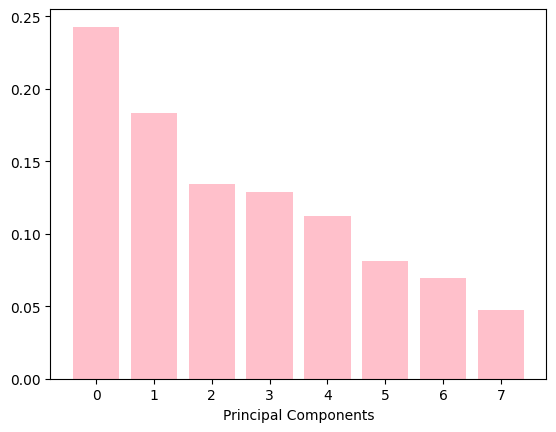

In [24]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance, color='pink')
ax.set_xlabel('Principal Components')

Since the PCA results are based on the listed characteristics: acoustics, danceability, energy, instrumentality, liveliness, locution, tempo, and valence, the ratio of variance explained for each principal component reflects the degree to which these musical characteristics can differentiate the tracks. of the songs in the data set.

1. **Acoustics (0.242818)** - Being the highest, this suggests that the acoustic properties of the songs have the most variation, which significantly affects how different tracks can be from each other in your data set .

2. **Danceability (0.183259)** and **Energy (0.134018)**: These components also have substantial variation, indicating that rhythms and energy levels contribute significantly to distinguishing between tracks.

3. **Instrumentality (0.128919)**: suggests that the instrumental content of the tracks is another important factor that differentiates the songs.

4. **Lower Components**: As explained variance decreases with liveliness, speech, tempo, and valence, these features contribute less distinctively to the variance between tracks.

Overall, PCA analysis helps identify which features most strongly define the uniqueness of the tracks in the data set, guiding further data reduction and modeling efforts by focusing on the most informative features.

####**Additional analysis**

In this step, the visualization of the cumulative explained variance obtained from the PCA analysis is addressed, since the scree plot did not show a clear "knee", making it difficult to determine the number of optimal intrinsic dimensions with that method alone. Alternatively, the cumulative explained variance graph is used to see how many features are necessary to explain approximately 85% of the variance, using a cut-off value that is chosen according to conventional criteria. This analysis helps decide how many principal components to retain to effectively reduce the dimensionality of the data. A dashed line is drawn at 85% on the graph to facilitate this evaluation.

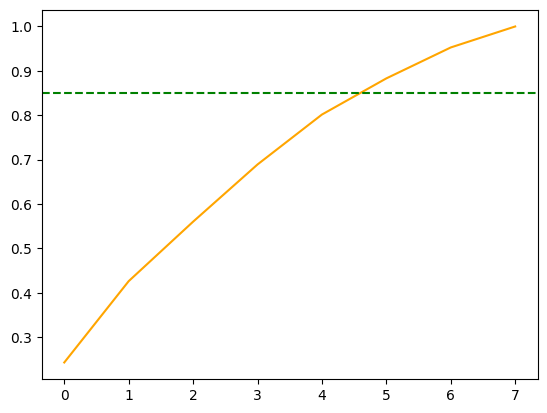

In [25]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance, color='orange')
ax.axhline(y=0.85, linestyle='--', color='green')

#### **Feature Projection**

From the figure, we can say about 6 features are needed to explain 85% of the variance, hence this is the number of features I will use to carry out the model training with.

In [26]:
num_components=6

# Perform PCA with the chosen number of components
pca = PCA(num_components)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

##**Classification models**

###**Decision tree**

Now the PCA dimension data will be used to classify songs into genres with a decision tree. Decision trees are easy-to-use rule-based classifiers that make binary decisions to classify data into categories. Not only are they easy to implement and understand, but they also allow you to visualize the decision-making process as a flowchart.

####**Training Decision tree**

In [27]:
# Train decision tree
tree = DecisionTreeClassifier(random_state =10)
tree.fit(train_pca,train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)
print(pred_labels_tree)

['Rock' 'Rock' 'Rock' ... 'Rock' 'Hip-Hop' 'Rock']


####**Decision tree VS logistic regression**

While the decision tree shows decent performance, it's important not to conclude prematurely that it's the ideal model for this task. Exploring other algorithms might yield even better results. Hence, logistic regression will be tested next. This method uses the logistic function to estimate the probability that a given input belongs to a particular class. By comparing both models—decision tree and logistic regression—on metrics like false positives and negatives, we can determine which model best suits our data.

In [28]:
# Train logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca, train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Import classification report function and create reports for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

# Print the classification reports
print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)


Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.63      0.63      0.63       233
        Rock       0.91      0.91      0.91       968

    accuracy                           0.86      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.86      0.86      0.86      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.76      0.46      0.57       233
        Rock       0.88      0.96      0.92       968

    accuracy                           0.87      1201
   macro avg       0.82      0.71      0.75      1201
weighted avg       0.86      0.87      0.85      1201



### **AI Model Deployment Plan for Music Genre Classification**:
1. **Data Collection**:
    - Obtain labeled datasets with samples of Hip-Hop and Rock songs. Use open data platforms or gather data from available online sources.
2. **Data Preprocessing**:
    - Clean the data, perform joins/merges of databases to have consistent records.
    - Split the data into training and testing sets.
3. **Model Training**:
    - Choose a suitable machine learning algorithm for classification, such as SVM, Random Forest, and Logistic Regression.
    - Train the model using the training dataset and fine-tune it using the validation set to enhance its performance.
4. **Model Evaluation**:
    - Assess the model using the test dataset to measure its accuracy, sensitivity, specificity, and other relevant performance metrics.
    - Make further adjustments to the model if necessary to improve its performance.
5. **Model Deployment**:
    - Deploy the trained model in a production environment, either locally or in the cloud.
    - Integrate the model into an application or service that allows users to upload a song and receive its musical genre classification.
6. **Monitoring and Maintenance**:
    - Establish a monitoring system to oversee the model's performance in production.
    - Perform regular model updates to adapt to changes in the data.

### **Impact Analysis**

#### **Benefits**

* **Automation:** Enables fast and accurate classification of music genres, useful for organizing and searching music in digital libraries.

* **Enhanced User Experience:** Provides more precise and personalized recommendations to users on music streaming platforms.

* **Efficiency:** Reduces the manual workload required to manually label large music collections.

#### **Challenges and Considerations:**

* **Model Generalization:** It is crucial to ensure that the model can adequately generalize across different subgenres of Hip-Hop and Rock, as well as other musical genres.

* **Data Bias:** The datasets used to train the model may contain inherent biases that could influence the model's predictions.

* **Privacy and Ethics:** Ethical and privacy implications must be considered when using users' musical data to train AI models.
This plan and analysis provide a basic framework for deploying an AI model to classify musical genres and assess its impacts in the context of song genre classification.